In [1]:
# Script para implementar funcionamiento de subprocess lanzado en script principal
# Fecha: 01/01/2025

import sys
import pandas as pd
import os
# módulo para verificar si un path existe
from pathlib import Path

# Módulo para bajer productos S2
sys.path.append(r'../utils')
import mod_dloader as mdl

# Para implementar funciones de snappy en módulo
import mod_snappy_S2 as msnap

# Módulo para graficar
import matplotlib.pyplot as plt

/opt/venv/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_path_model = r'/src/Output/Test_Tucu_2_20250101T132641/table/statistics.xls'
output_path = r'/src/Output/Test_Tucu_2_20250101T132641/table/'
df = pd.read_excel(df_path_model)

In [3]:
display(df)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 1,Unnamed: 2,cloudCover,Id,Name,shape,acq_date,path2png,mean_value,std_dev_value
0,0,MSIL2A,T20JKQ,N0500,0.136110,b3cdc4d2-3950-4747-a6b5-e87b1d7fe38b,S2B_MSIL2A_20190108T142039_N0500_R010_T20JKQ_2...,"POLYGON ((-66.03079 -27.2812764750355, -66.052...",2019-01-08 14:20:39,/src/Output/Test_Tucu_2_20250101T132641/NDVI_c...,0.276243,0.357225
1,1,MSIL2A,T20JKQ,N0500,41.300693,92e57255-9fea-40e5-a16d-3fb930bf38c8,S2A_MSIL2A_20190113T142031_N0500_R010_T20JKQ_2...,"POLYGON ((-66.03116 -27.2941732245053, -66.052...",2019-01-13 14:20:31,/src/Output/Test_Tucu_2_20250101T132641/NDVI_c...,0.328546,0.383394


In [4]:
# Función para "Creación de ploteo de serie temporal" a partir de df con fecha de adquisición y valores estadísticos.
# También debe tener como entrada el path donde se guarde el gráfico (/src/Output/Test_Tucu_2_20250101T132641/)
# Plot with Matplotlib
def temp_series(df, path2save, verbose):
    out_path = os.path.join(path2save, 'temporal_series.png')
    plt.figure(figsize=(10, 6))
#     plt.plot(df['acq_date'], df['mean_value'], marker='o', label='mean_NDVI')
    plt.plot(df['acq_date'], df['mean_value'], linestyle='-', marker='o', color='green', label='mean_NDVI')  # Red dashed line
    plt.plot(df['acq_date'], df['cloudCover'],  linestyle='', marker='D', color='blue', label='Product Cloud cover')        # Blue solid 
    plt.title('Temporal Series')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.grid()
    plt.savefig(out_path , bbox_inches='tight')
    if verbose:
        plt.show()
    return None

def temp_series_2(df, path2save, verbose):
    out_path = os.path.join(path2save, 'temporal_series.png')
    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot the first column on the primary y-axis
#     ax1.plot(df['acq_date'], df['mean_value'], linestyle='-', marker='o', color='green', label='mean_NDVI')
#     xerr_lower = df['std_dev_value']/2
#     xerr_upper = df['std_dev_value']/2
    ndvi_color = 'green'
    ax1.errorbar(df['acq_date'], df['mean_value'], yerr = df['std_dev_value']/2, linestyle='-', marker='o', color=ndvi_color, label='mean_NDVI')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('NDVI [-]', color=ndvi_color)
    ax1.tick_params(axis='y', labelcolor=ndvi_color)
#     ax1.legend('lower right')
    plt.legend(loc='lower right')

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(df['acq_date'], df['cloudCover'], linestyle='', marker='D', color='blue', label='Product Cloud cover')
    ax2.set_ylabel('Cloud cover (%)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
#     ax2.legend('lower left')

    # Add titles and grid
    plt.title('Temporal series two axis')
    fig.tight_layout()  # Adjust layout to prevent overlap
    plt.grid()
    plt.legend()    
    plt.savefig(out_path , bbox_inches='tight')
    
    if verbose:
        plt.show()
    return None
    

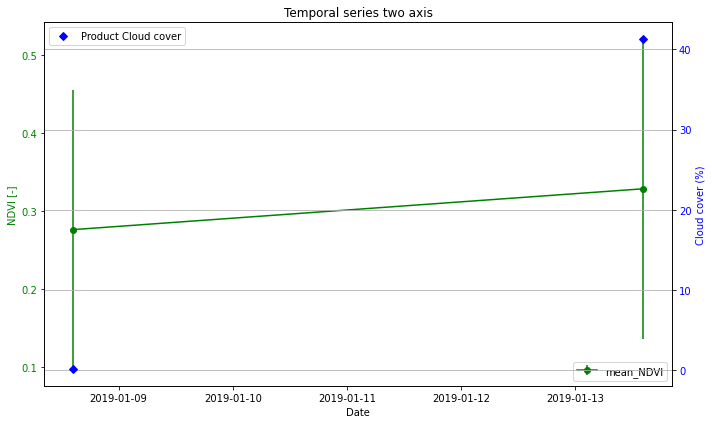

In [5]:
msnap.temp_series_2(df, output_path, True)